<a href="https://colab.research.google.com/github/EricHuangCCU/space_reallocation/blob/master/space_allocation_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

OBJECT_NUM = 10  # number of object
OBJECT_TYPE = 3  # number of obj type

# assume container has size {30, 30, 30}
CONTAINER_SIZE = 30

# define a class called object
class Object:
    def __init__(self):
        self.H = 0
        self.W = 0
        self.L = 0
        self.type = 0

    def set_value(self, h, w, l, t):
        self.H = h
        self.W = w
        self.L = l
        self.type = t

    def show_volume(self):
        return self.H * self.W * self.L

    def show_type(self):
        return self.type

    def show_H(self):
        return self.H

    def show_W(self):
        return self.W

    def show_L(self):
        return self.L

    def set_position(self, position):
        self.position = position


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def box(position1, position2, color):
    x1, y1, z1 = position1
    x2, y2, z2 = position2

    width = abs(x2 - x1)
    depth = abs(y2 - y1)
    height = abs(z2 - z1)

    x = np.arange(x1, x2 + 1)
    y = np.arange(y1, y2 + 1)
    z = np.arange(z1, z2 + 1)

    X0, Y0 = np.meshgrid(x, y)
    Z0 = np.full((depth + 1, width + 1), z1)

    X1 = X0
    Y1 = Y0
    Z1 = Z0 + height

    X2, Z2 = np.meshgrid(x, z)
    Y2 = np.full((height + 1, width + 1), y1)

    X3 = X2
    Y3 = Y2 + depth
    Z3 = Z2

    Y4, Z4 = np.meshgrid(y, z)
    X4 = np.full((height + 1, depth + 1), x1)

    X5 = X4 + width
    Y5 = Y4
    Z5 = Z4

    surfaces = [
        [X0, Y0, Z0],
        [X1, Y1, Z1],
        [X2, Y2, Z2],
        [X3, Y3, Z3],
        [X4, Y4, Z4],
        [X5, Y5, Z5]
    ]


    for X, Y, Z in surfaces:
        ax.plot_surface(X, Y, Z, color=color)




In [32]:
random.seed()
obj = []

for _ in range(OBJECT_NUM):
    new_obj = Object()
    h = random.randint(1, 10)
    w = random.randint(1, 10)
    l = random.randint(1, 10)
    t = random.randint(0, OBJECT_TYPE - 1)
    new_obj.set_value(h, w, l, t)
    obj.append(new_obj)

obj.sort(key=lambda x: x.show_type())

index_end = 0
for i in range(OBJECT_TYPE):
    index_start = index_end

    for j in range(OBJECT_NUM):
        if obj[j].show_type() == i:
            index_end += 1

    obj[index_start:index_end] = sorted(obj[index_start:index_end], key=lambda x:x.show_volume(), reverse=True)

    index_start = index_end

for i in range(OBJECT_NUM):
    print(f"object {i} : H:{obj[i].show_H()}, W:{obj[i].show_W()}, L:{obj[i].show_L()}, tpye:{obj[i].show_type()}" )

#將物件照著類型及體積大小做排序

print('\n')







object 0 : H:6, W:5, L:10, tpye:0
object 1 : H:6, W:5, L:7, tpye:0
object 2 : H:1, W:10, L:1, tpye:0
object 3 : H:9, W:8, L:6, tpye:1
object 4 : H:4, W:8, L:3, tpye:1
object 5 : H:3, W:8, L:3, tpye:1
object 6 : H:2, W:1, L:1, tpye:1
object 7 : H:10, W:5, L:4, tpye:2
object 8 : H:9, W:2, L:2, tpye:2
object 9 : H:1, W:5, L:6, tpye:2




In [33]:
record = [] #紀錄放置的位置
rest = [] #記錄放不進去的obj

def fitting(obj):
    for i in range(OBJECT_NUM):
        #第一個起點為(0,0,0)
        if len(record) == 0:
            record.append([[0, 0, 0], [obj[i].show_H(), obj[i].show_W(), obj[i].show_L()], obj[i].show_type()])
        else:
            #如果同type看能否往上疊或往前放
            if obj[i].show_type() == obj[i-1].show_type() :
                rec = record[-1]
                #往上疊
                if rec[1][1] - rec[0][1] >=obj[i].show_W() and rec[1][2] - rec[0][2] >=obj[i].show_L() and rec[1][0]+obj[i].show_H() <= CONTAINER_SIZE:
                    record.append([[rec[1][0], rec[0][1], rec[0][2]],
                                    [rec[1][0]+obj[i].show_H(), rec[0][1]+obj[i].show_W(), rec[0][2]+obj[i].show_L()],
                                    obj[i].show_type()])

                #往前疊
                elif rec[1][0] - rec[0][0] >=obj[i].show_H() and rec[1][2] - rec[0][2] >=obj[i].show_L() and rec[1][1]+obj[i].show_W()<= CONTAINER_SIZE:
                    record.append([[rec[0][0], rec[1][1], rec[0][2]],
                                    [rec[0][0]+obj[i].show_H(), rec[1][1]+obj[i].show_W(), rec[0][2]+obj[i].show_L()],
                                    obj[i].show_type()])

                else:#都放不進去就先記錄起來
                    rest.append([i, [obj[i].show_H(), obj[i].show_W(), obj[i].show_L()], obj[i].show_type()])
            else:
                #如果不同type的話，先考慮往旁邊放，旁邊沒空間再從record找空位放
                max_L = 0
                for j in record:
                    if j[1][2] > max_L:
                        max_L = j[1][2] #找到前一個類型最長的物件並檢查是否還有空位塞在其旁邊
                        temp_rec = j

                if (CONTAINER_SIZE - max_L) >= obj[i].show_L():
                    record.append([[temp_rec[0][0], temp_rec[0][1], temp_rec[1][2]],
                                   [temp_rec[0][0]+obj[i].show_H(), temp_rec[0][1]+obj[i].show_W(), temp_rec[1][2]+obj[i].show_L()],
                                   obj[i].show_type()])
                else:
                    #旁邊塞不下就找其他空位
                    rec = record[-1]
                    #往上疊
                    if rec[1][1] - rec[0][1] >=obj[i].show_W() and rec[1][2] - rec[0][2] >=obj[i].show_L() and rec[1][0]+obj[i].show_H() <= CONTAINER_SIZE:
                        record.append([[rec[1][0], rec[0][1], rec[0][2]],
                                        [rec[1][0]+obj[i].show_H(), rec[0][1]+obj[i].show_W(), rec[0][2]+obj[i].show_L()],
                                        obj[i].show_type()])

                    #往前疊
                    elif rec[1][0] - rec[0][0] >=obj[i].show_H() and rec[1][2] - rec[0][2] >=obj[i].show_L() and rec[1][1]+obj[i].show_W()<= CONTAINER_SIZE:
                        record.append([[rec[0][0], rec[1][1], rec[0][2]],
                                        [rec[0][0]+obj[i].show_H(), rec[1][1]+obj[i].show_W(), rec[0][2]+obj[i].show_L()],
                                        obj[i].show_type()])

                    else:#都放不進去就先記錄起來
                        rest.append([i, [obj[i].show_H(), obj[i].show_W(), obj[i].show_L()], obj[i].show_type()])



fitting(obj)

for a in record:
    print(f"{a[0]}, {a[1]}, type: {a[2]}")

print("\n")
for b in rest:
    print(f"can't put object{b[0]}: {b[1]}, tpye: {b[2]}")

[0, 0, 0], [6, 5, 10], type: 0
[6, 0, 0], [12, 5, 7], type: 0
[6, 5, 0], [7, 15, 1], type: 0
[0, 0, 10], [9, 8, 16], type: 1
[9, 0, 10], [13, 8, 13], type: 1
[13, 0, 10], [16, 8, 13], type: 1
[16, 0, 10], [18, 1, 11], type: 1
[0, 0, 16], [10, 5, 20], type: 2
[10, 0, 16], [19, 2, 18], type: 2


can't put object9: [1, 5, 6], tpye: 2


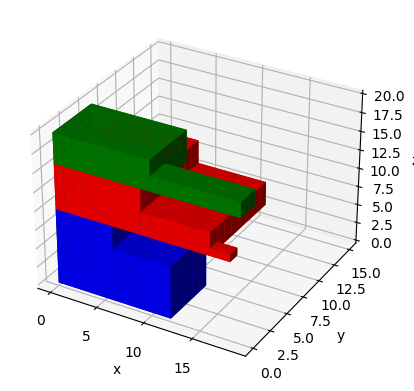

In [34]:
color = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'cyan', 'gray']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for rec in record:
  box(rec[0], rec[1], color[int(rec[2])])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

#假設只能疊一層

In [35]:
obj_list = obj

for i in range(OBJECT_NUM):
    print(f"object {i} : H:{obj_list[i].show_H()}, W:{obj_list[i].show_W()}, L:{obj_list[i].show_L()}, tpye:{obj_list[i].show_type()}" )

object 0 : H:6, W:5, L:10, tpye:0
object 1 : H:6, W:5, L:7, tpye:0
object 2 : H:1, W:10, L:1, tpye:0
object 3 : H:9, W:8, L:6, tpye:1
object 4 : H:4, W:8, L:3, tpye:1
object 5 : H:3, W:8, L:3, tpye:1
object 6 : H:2, W:1, L:1, tpye:1
object 7 : H:10, W:5, L:4, tpye:2
object 8 : H:9, W:2, L:2, tpye:2
object 9 : H:1, W:5, L:6, tpye:2


In [36]:
import numpy as np

def bin_packing(objects, capacity):


    n = len(objects)
    dp = np.full((capacity[0] + 1, capacity[1] + 1), float('inf'))


    # Initialize the base cases.
    for i in range(capacity[0] + 1):
        for j in range(capacity[1] + 1):
            if i >= objects[0][0] and j >= objects[0][1]:
                dp[i][j] = objects[0][0] * objects[0][1]

    # Solve the subproblems.
    for i in range(1, n):
        for j in range(capacity[0] + 1):
            for k in range(capacity[1] + 1):
                if j >= objects[i][0] and k >= objects[i][1]:
                    # Try placing the object horizontally.
                    if dp[j][k] > dp[j - objects[i][0]][k] + objects[i][0] * objects[i][1] :
                        dp[j][k] = dp[j - objects[i][0]][k] + objects[i][0] * objects[i][1]

                    # Try placing the object vertically.
                    if dp[j][k] > dp[j][k - objects[i][1]] + objects[i][0] * objects[i][1] :
                        dp[j][k] = dp[j][k - objects[i][1]] + objects[i][0] * objects[i][1]


    # Reconstruct the solution.
    solution = []
    i = n - 1
    j = capacity[0]
    k = capacity[1]
    while i >= 0:
        if dp[j][k] == dp[j - objects[i][0]][k] + objects[i][0] * objects[i][1]:
            # The object was placed horizontally.
            solution.append((j - objects[i][0], k, i))
            j -= objects[i][0]
            i -= 1
        else:
            # The object was placed vertically.
            solution.append((j, k - objects[i][1], i))
            k -= objects[i][1]
            i -= 1

    return solution
objects = []

for i in obj_list:
  objects.append([i.show_W(), i.show_L()])

#objects = [(3, 5), (1, 2), (5, 4), (2, 1), (3, 3)]
capacity = (30, 30)

solution = bin_packing(objects, capacity)
print(solution)


[(30, 24, 9), (30, 22, 8), (30, 18, 7), (30, 17, 6), (30, 14, 5), (30, 11, 4), (30, 5, 3), (20, 5, 2), (15, 5, 1), (10, 5, 0)]


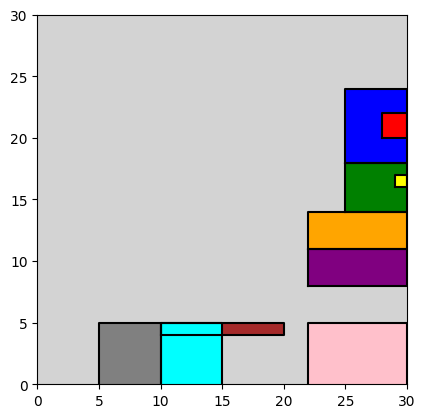

In [37]:
import matplotlib.pyplot as plt

def visualize_bin_packing(objects, solution, capacity):
    # Create a new figure
    plt.figure()

    # Plot the container
    plt.fill([0, capacity[0], capacity[0], 0], [0, 0, capacity[1], capacity[1]], 'lightgray')

    colorNum=0
    # Plot each object
    for obj in solution:
        length, width = objects[obj[2]]
        x, y = obj[0], obj[1]
        #print(f"l:{length} w:{width} x:{x} y:{y}")
        color_num = colorNum % 10
        plt.fill([x-length, x, x, x-length], [y, y, y - width, y - width], color[color_num])
        plt.plot([x-length, x, x, x-length, x-length], [y- width, y - width, y, y, y - width], 'black')
        colorNum = colorNum + 1

    # Set plot limits and aspect ratio
    plt.xlim(0, capacity[0])
    plt.ylim(0, capacity[1])
    plt.gca().set_aspect('equal', adjustable='box')

    # Show the plot
    plt.show()

# Example objects and solution


# Visualize the bin packing
visualize_bin_packing(objects, solution, capacity)